**Problem statement 1: Forecast the CocaCola prices. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [ ]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
import matplotlib.pyplot as plt

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Q1_86'),
  Text(1, 0, 'Q2_86'),
  Text(2, 0, 'Q3_86'),
  Text(3, 0, 'Q4_86'),
  Text(4, 0, 'Q1_87'),
  Text(5, 0, 'Q2_87'),
  Text(6, 0, 'Q3_87'),
  Text(7, 0, 'Q4_87'),
  Text(8, 0, 'Q1_88'),
  Text(9, 0, 'Q2_88'),
  Text(10, 0, 'Q3_88'),
  Text(11, 0, 'Q4_88'),
  Text(12, 0, 'Q1_89'),
  Text(13, 0, 'Q2_89'),
  Text(14, 0, 'Q3_89'),
  Text(15, 0, 'Q4_89'),
  Text(16, 0, 'Q1_90'),
  Text(17, 0, 'Q2_90'),
  Text(18, 0, 'Q3_90'),
  Text(19, 0, 'Q4_90'),
  Text(20, 0, 'Q1_91'),
  Text(21, 0, 'Q2_91'),
  Text(22, 0, 'Q3_91'),
  Text(23, 0, 'Q4_91'),
  Text(24, 0, 'Q1_92'),
  Text(25, 0, 'Q2_92'),
  Text(26, 0, 'Q3_92'),
  Text(27, 0, 'Q4_92'),
  Text(28, 0, 'Q1_93'),
  Text(29, 0, 'Q2_93'),
  Text(30, 0, 'Q3_93'),
  Text(31, 0, 'Q4_93'),

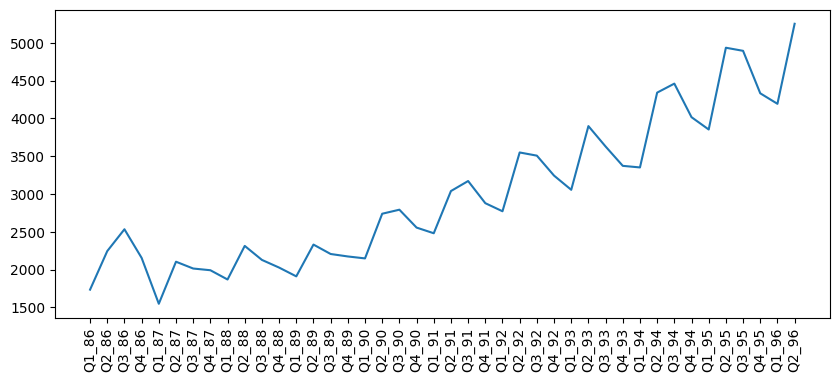

In [ ]:
#Line plot of the cocacola data
plt.figure(figsize=(10,4))
plt.plot('Quarter','Sales',data= cocacola)
plt.xticks(rotation=90)

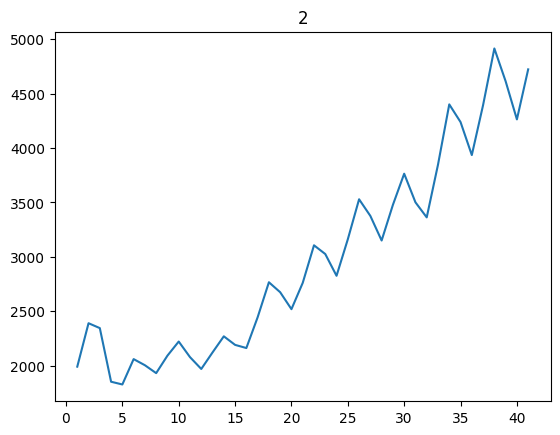

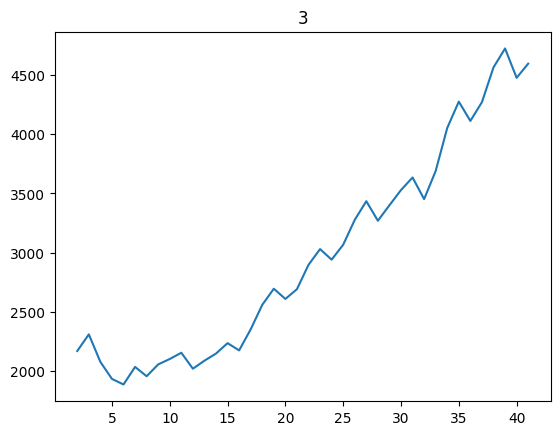

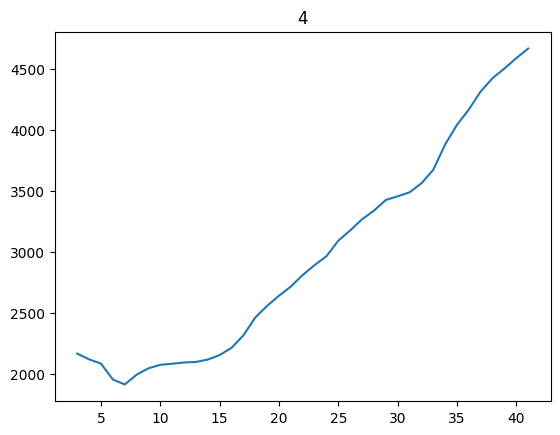

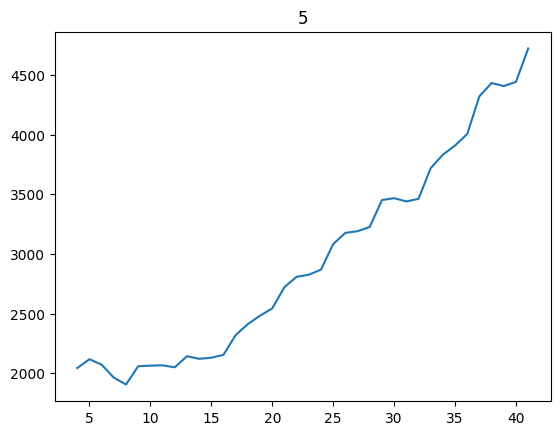

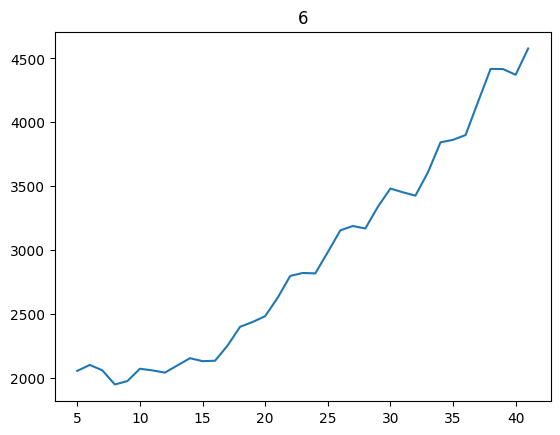

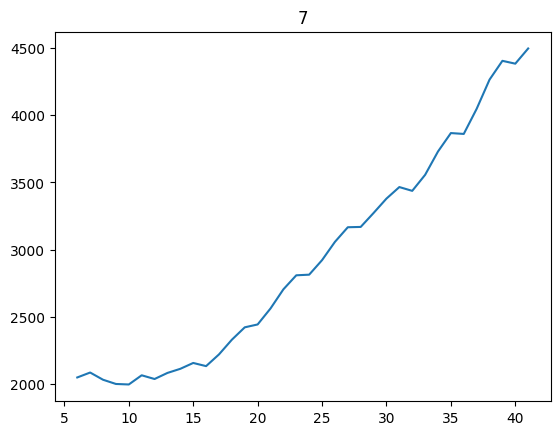

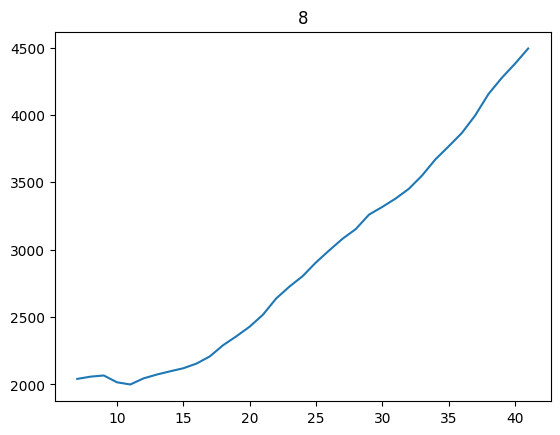

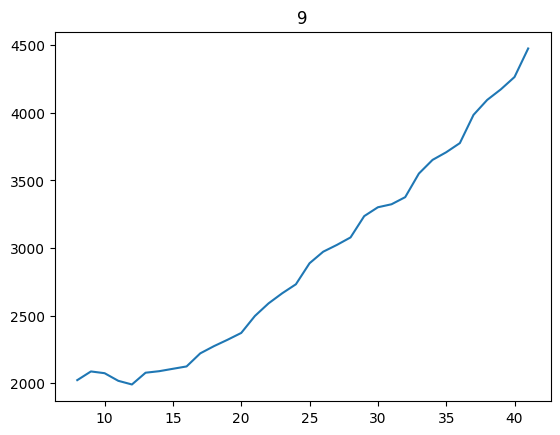

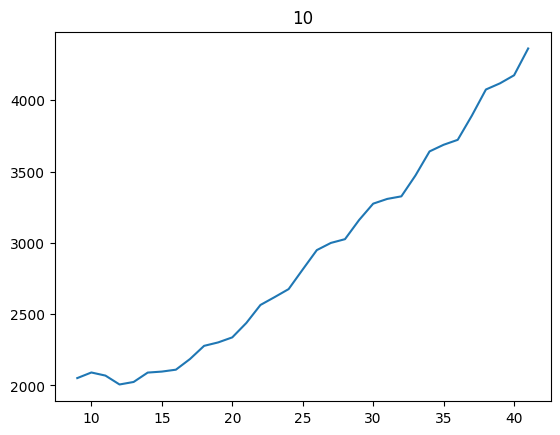

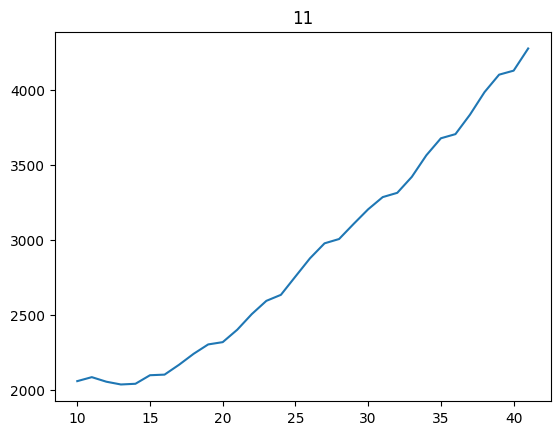

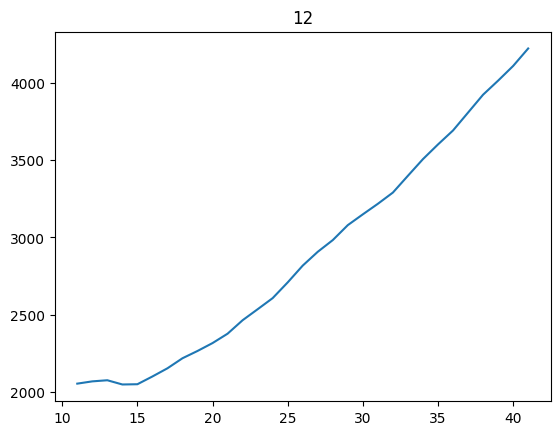

In [ ]:
#Checking different window sizes for the cocacola data so as to find the best window size for moving average
for i in range(2,13):
    cocacola.Sales.rolling(i).mean().plot()
    plt.title(i)
    plt.show()

In [ ]:
#from the above graphs it was clear that period of 4 is the most suited window size where graph is getting more smooth so window size =4
#Also this can be also verified as this smoothening is occuring at window size of 8 also and its getting bad after 4 and 8

In [ ]:
#Time series decomposition plot with season and trend and noise

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<function matplotlib.pyplot.show(close=None, block=None)>

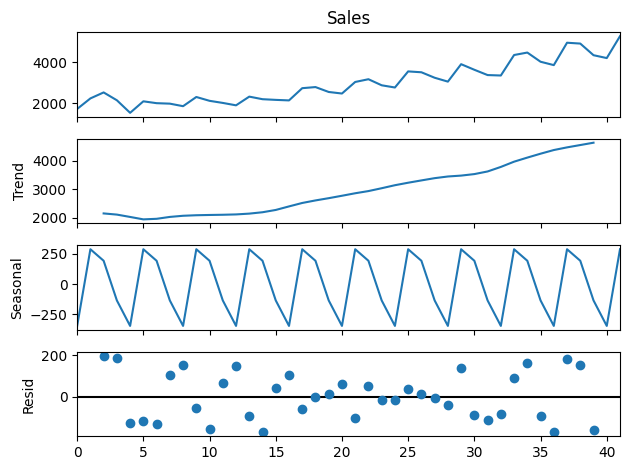

In [ ]:
seasonal_decompose(cocacola.Sales,period=4).plot()
plt.show

In [ ]:
#correlation plots
import statsmodels.graphics.tsaplots as tsa_plots

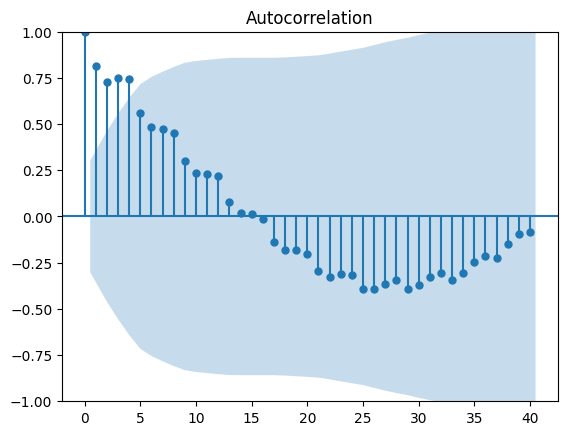

In [ ]:
tsa_plots.plot_acf(cocacola.Sales,lags=40)
plt.show()

In [ ]:
#Here we are getting correlation as first positive and then becoming negative and then again becoming positive.
#This is happening as sales is increasing and decreasing in a particular period as it has some seasonality
#So model with the seasonality maybe well suited model for this type of data for forecasting i.e. triple exponential model
#Still we will try with the different models and will choose the best having minimum rmse

In [ ]:
#Splitting the data

In [ ]:
coctrain= cocacola.head(33)
coctest= cocacola.tail(9)

In [ ]:
#defining rsme
def rsme(pred,org):
    sales = (((pred-org)**2).mean())**0.5
    return sales

In [ ]:
#defining MAPE
import numpy as np
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
#model 1: simple exponetial model

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(coctrain.Sales).fit(smoothing_level=0.4)
pred_ses= ses_model.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
rsme(pred_ses,coctest.Sales)

1140.4071887254531

In [ ]:
MAPE(pred_ses,coctest.Sales)

22.836610857723876

In [ ]:
#Calculating the best value of smoothing level which gives minimum MAPE error

In [ ]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9]
for i in x:
    ses_model1 = SimpleExpSmoothing(coctrain.Sales).fit(smoothing_level=i)
    pred_ses1= ses_model1.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])
    score= MAPE(pred_ses1,coctest.Sales)
    print("for smoothing level",i,"MAPE is",score)

for smoothing level 0.2 MAPE is 25.002287586604808
for smoothing level 0.3 MAPE is 23.200689188928724
for smoothing level 0.4 MAPE is 22.836610857723876
for smoothing level 0.41 MAPE is 22.836676425965045
for smoothing level 0.42 MAPE is 22.841128651284293
for smoothing level 0.43 MAPE is 22.849570981385927
for smoothing level 0.44 MAPE is 22.86164186038317
for smoothing level 0.5 MAPE is 22.99353606792988
for smoothing level 0.55 MAPE is 23.155816630962267
for smoothing level 0.6 MAPE is 23.34277224538099
for smoothing level 0.7 MAPE is 23.73187288813724
for smoothing level 0.78 MAPE is 24.010975409600757
for smoothing level 0.8 MAPE is 24.07202466276748
for smoothing level 0.9 MAPE is 24.308309940897125


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

In [ ]:
#so smoothing value nearby 0.4 gives the minimum MAPE error

In [ ]:
#Calculating the best value of smoothing level which gives minimum rsme error

In [ ]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9]
for i in x:
    ses_model2 = SimpleExpSmoothing(coctrain.Sales).fit(smoothing_level=i)
    pred_ses2= ses_model2.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])
    score2= rsme(pred_ses2,coctest.Sales)
    print("for smoothing level",i,"rsme is",score2)

for smoothing level 0.2 rsme is 1229.7220290180198
for smoothing level 0.3 rsme is 1155.3466646288123
for smoothing level 0.4 rsme is 1140.4071887254531
for smoothing level 0.41 rsme is 1140.4098762699102
for smoothing level 0.42 rsme is 1140.5923688770151
for smoothing level 0.43 rsme is 1140.9384258755435
for smoothing level 0.44 rsme is 1141.4332507093357
for smoothing level 0.5 rsme is 1146.8423967215863
for smoothing level 0.55 rsme is 1153.5036206929883
for smoothing level 0.6 rsme is 1161.1856219251238
for smoothing level 0.7 rsme is 1177.2002657978023
for smoothing level 0.78 rsme is 1188.7089990742957
for smoothing level 0.8 rsme is 1191.2286751514882
for smoothing level 0.9 rsme is 1200.9885434567843


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

In [ ]:
#so smoothing value nearby 0.4 gives the minimum rsme error, hence finalizing smoothing value as 0.4

In [ ]:
#2. Holt double exponential smoothing method

In [ ]:
from statsmodels.tsa.holtwinters import Holt
des_model = Holt(coctrain.Sales).fit(smoothing_level=0.4,smoothing_trend=0.2)
pred_des= des_model.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
rsme(pred_des,coctest.Sales)

848.4150872772021

In [ ]:
MAPE(pred_des,coctest.Sales)

16.009562795161134

In [ ]:
#Calculating the value of smoothing trend which gives minimum MAPE error

In [ ]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9]
y= [0.05,0.07,0.1,0.12,0.13,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
for i in x:
    for j in y:
        des_model1 = Holt(coctrain.Sales).fit(smoothing_level=i,smoothing_trend=j)
        pred_des1= des_model1.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])
        dscore= MAPE(pred_des1,coctest.Sales)
        print("for smoothing levl",i,"smoothing trend",j,"MAPE is",dscore)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.2 smoothing trend 0.05 MAPE is 8.810506613523744
for smoothing levl 0.2 smoothing trend 0.07 MAPE is 8.931225721283688
for smoothing levl 0.2 smoothing trend 0.1 MAPE is 13.17409369061285
for smoothing levl 0.2 smoothing trend 0.12 MAPE is 13.773345290222633
for smoothing levl 0.2 smoothing trend 0.13 MAPE is 13.470881071830805
for smoothing levl 0.2 smoothing trend 0.15 MAPE is 12.244835982327409
for smoothing levl 0.2 smoothing trend 0.16 MAPE is 11.543900574572886
for smoothing levl 0.2 smoothing trend 0.17 MAPE is 10.957931385644097
for smoothing levl 0.2 smoothing trend 0.18 MAPE is 10.570153886145128
for smoothing levl 0.2 smoothing trend 0.19 MAPE is 10.260323633519521
for smoothing levl 0.2 smoothing trend 0.2 MAPE is 9.989783983498473
for smoothing levl 0.2 smoothing trend 0.21 MAPE is 9.766198685335478
for smoothing levl 0.3 smoothing trend 0.05 MAPE is 9.015667100882668
for smoothing levl 0.3 smoothing trend 0.07 MAPE is 9.522322357082182
for smoothing l

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

MAPE is 12.684087800020405
for smoothing levl 0.3 smoothing trend 0.15 MAPE is 12.644676465019293
for smoothing levl 0.3 smoothing trend 0.16 MAPE is 12.62023513619803
for smoothing levl 0.3 smoothing trend 0.17 MAPE is 12.627044784949593
for smoothing levl 0.3 smoothing trend 0.18 MAPE is 12.678421999121547
for smoothing levl 0.3 smoothing trend 0.19 MAPE is 12.780583033314382
for smoothing levl 0.3 smoothing trend 0.2 MAPE is 12.934539003967162
for smoothing levl 0.3 smoothing trend 0.21 MAPE is 13.137625473432447
for smoothing levl 0.4 smoothing trend 0.05 MAPE is 9.117973741143228
for smoothing levl 0.4 smoothing trend 0.07 MAPE is 10.277583392653213
for smoothing levl 0.4 smoothing trend 0.1 MAPE is 13.063587487736802
for smoothing levl 0.4 smoothing trend 0.12 MAPE is 14.062245883016475
for smoothing levl 0.4 smoothing trend 0.13 MAPE is 14.36509211855017
for smoothing levl 0.4 smoothing trend 0.15 MAPE is 14.825602345580336
for smoothing levl 0.4 smoothing trend 0.16 MAPE is 15.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

 0.41 smoothing trend 0.05 MAPE is 9.125821298337291
for smoothing levl 0.41 smoothing trend 0.07 MAPE is 10.354800358022871
for smoothing levl 0.41 smoothing trend 0.1 MAPE is 13.203335269212566
for smoothing levl 0.41 smoothing trend 0.12 MAPE is 14.224648080252264
for smoothing levl 0.41 smoothing trend 0.13 MAPE is 14.542004629405458
for smoothing levl 0.41 smoothing trend 0.15 MAPE is 15.03140070931807
for smoothing levl 0.41 smoothing trend 0.16 MAPE is 15.256076374725533
for smoothing levl 0.41 smoothing trend 0.17 MAPE is 15.486687545062287
for smoothing levl 0.41 smoothing trend 0.18 MAPE is 15.72977755771214
for smoothing levl 0.41 smoothing trend 0.19 MAPE is 15.987865320717766
for smoothing levl 0.41 smoothing trend 0.2 MAPE is 16.26082859582215
for smoothing levl 0.41 smoothing trend 0.21 MAPE is 16.546929790617646
for smoothing levl 0.42 smoothing trend 0.05 MAPE is 9.133364742269599
for smoothing levl 0.42 smoothing trend 0.07 MAPE is 10.431693140672321
for smoothing lev

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.42 smoothing trend 0.16 MAPE is 15.470462652637416
for smoothing levl 0.42 smoothing trend 0.17 MAPE is 15.711231838501128
for smoothing levl 0.42 smoothing trend 0.18 MAPE is 15.96273270494733
for smoothing levl 0.42 smoothing trend 0.19 MAPE is 16.22748848674906
for smoothing levl 0.42 smoothing trend 0.2 MAPE is 16.505492887037022
for smoothing levl 0.42 smoothing trend 0.21 MAPE is 16.795200594747037
for smoothing levl 0.43 smoothing trend 0.05 MAPE is 9.140625182826362
for smoothing levl 0.43 smoothing trend 0.07 MAPE is 10.508170014642763
for smoothing levl 0.43 smoothing trend 0.1 MAPE is 13.486424519743629
for smoothing levl 0.43 smoothing trend 0.12 MAPE is 14.549165491117853
for smoothing levl 0.43 smoothing trend 0.13 MAPE is 14.892620029654474
for smoothing levl 0.43 smoothing trend 0.15 MAPE is 15.433513108943417
for smoothing levl 0.43 smoothing trend 0.16 MAPE is 15.680833197506196
for smoothing levl 0.43 smoothing trend 0.17 MAPE is 15.9310132944308

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.44 smoothing trend 0.07 MAPE is 10.584152711793736
for smoothing levl 0.44 smoothing trend 0.1 MAPE is 13.628936759060402
for smoothing levl 0.44 smoothing trend 0.12 MAPE is 14.710663648746804
for smoothing levl 0.44 smoothing trend 0.13 MAPE is 15.065905572503413
for smoothing levl 0.44 smoothing trend 0.15 MAPE is 15.629897027268527
for smoothing levl 0.44 smoothing trend 0.16 MAPE is 15.887346914500316
for smoothing levl 0.44 smoothing trend 0.17 MAPE is 16.146297338830795
for smoothing levl 0.44 smoothing trend 0.18 MAPE is 16.412932999848454
for smoothing levl 0.44 smoothing trend 0.19 MAPE is 16.68982711395067
for smoothing levl 0.44 smoothing trend 0.2 MAPE is 16.97721101043082
for smoothing levl 0.44 smoothing trend 0.21 MAPE is 17.273900668313175
for smoothing levl 0.5 smoothing trend 0.05 MAPE is 9.432680910862004
for smoothing levl 0.5 smoothing trend 0.07 MAPE is 11.026516972475017
for smoothing levl 0.5 smoothing trend 0.1 MAPE is 14.479892822562242


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.5 smoothing trend 0.12 MAPE is 15.656851849973869
for smoothing levl 0.5 smoothing trend 0.13 MAPE is 16.069846530557765
for smoothing levl 0.5 smoothing trend 0.15 MAPE is 16.74615988810343
for smoothing levl 0.5 smoothing trend 0.16 MAPE is 17.052998567735372
for smoothing levl 0.5 smoothing trend 0.17 MAPE is 17.35515117957732
for smoothing levl 0.5 smoothing trend 0.18 MAPE is 17.658536973464752
for smoothing levl 0.5 smoothing trend 0.19 MAPE is 17.96600466857397
for smoothing levl 0.5 smoothing trend 0.2 MAPE is 18.278425937762584
for smoothing levl 0.5 smoothing trend 0.21 MAPE is 18.59547578728581
for smoothing levl 0.55 smoothing trend 0.05 MAPE is 9.664553307994233
for smoothing levl 0.55 smoothing trend 0.07 MAPE is 11.373400387281308
for smoothing levl 0.55 smoothing trend 0.1 MAPE is 15.164684603813908
for smoothing levl 0.55 smoothing trend 0.12 MAPE is 16.403375498560877
for smoothing levl 0.55 smoothing trend 0.13 MAPE is 16.85283501406804
for smoot

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.6 smoothing trend 0.19 MAPE is 19.80252636599262
for smoothing levl 0.6 smoothing trend 0.2 MAPE is 20.15102584386354
for smoothing levl 0.6 smoothing trend 0.21 MAPE is 20.500298404732277
for smoothing levl 0.7 smoothing trend 0.05 MAPE is 10.227481065941154
for smoothing levl 0.7 smoothing trend 0.07 MAPE is 13.076151906159128
for smoothing levl 0.7 smoothing trend 0.1 MAPE is 16.963997298417908
for smoothing levl 0.7 smoothing trend 0.12 MAPE is 18.330382235065947
for smoothing levl 0.7 smoothing trend 0.13 MAPE is 18.85377717257207
for smoothing levl 0.7 smoothing trend 0.15 MAPE is 19.745089245344023
for smoothing levl 0.7 smoothing trend 0.16 MAPE is 20.14916861366019


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.7 smoothing trend 0.17 MAPE is 20.5396906790458
for smoothing levl 0.7 smoothing trend 0.18 MAPE is 20.92250102753991
for smoothing levl 0.7 smoothing trend 0.19 MAPE is 21.301081812046498
for smoothing levl 0.7 smoothing trend 0.2 MAPE is 21.677357709949646
for smoothing levl 0.7 smoothing trend 0.21 MAPE is 22.052258381008855
for smoothing levl 0.78 smoothing trend 0.05 MAPE is 10.455567264265364
for smoothing levl 0.78 smoothing trend 0.07 MAPE is 13.82761415335399
for smoothing levl 0.78 smoothing trend 0.1 MAPE is 17.71146735128586
for smoothing levl 0.78 smoothing trend 0.12 MAPE is 19.11777418445297
for smoothing levl 0.78 smoothing trend 0.13 MAPE is 19.66421653212027
for smoothing levl 0.78 smoothing trend 0.15 MAPE is 20.60012931252413
for smoothing levl 0.78 smoothing trend 0.16 MAPE is 21.024313795906675
for smoothing levl 0.78 smoothing trend 0.17 MAPE is 21.433085542156178
for smoothing levl 0.78 smoothing trend 0.18 MAPE is 21.83226716109923


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.78 smoothing trend 0.19 MAPE is 22.225440165003892
for smoothing levl 0.78 smoothing trend 0.2 MAPE is 22.614695657375492
for smoothing levl 0.78 smoothing trend 0.21 MAPE is 23.00115769942008
for smoothing levl 0.8 smoothing trend 0.05 MAPE is 10.539684280487064
for smoothing levl 0.8 smoothing trend 0.07 MAPE is 13.989679481604979
for smoothing levl 0.8 smoothing trend 0.1 MAPE is 17.870699861422594
for smoothing levl 0.8 smoothing trend 0.12 MAPE is 19.283916436952993
for smoothing levl 0.8 smoothing trend 0.13 MAPE is 19.834400310066627
for smoothing levl 0.8 smoothing trend 0.15 MAPE is 20.77796117757612
for smoothing levl 0.8 smoothing trend 0.16 MAPE is 21.205447437183246
for smoothing levl 0.8 smoothing trend 0.17 MAPE is 21.617087833801307
for smoothing levl 0.8 smoothing trend 0.18 MAPE is 22.018696535228855
for smoothing levl 0.8 smoothing trend 0.19 MAPE is 22.41387130815194
for smoothing levl 0.8 smoothing trend 0.2 MAPE is 22.804732952326596
for smoot

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.9 smoothing trend 0.1 MAPE is 18.48731123382002
for smoothing levl 0.9 smoothing trend 0.12 MAPE is 19.915917301452748
for smoothing levl 0.9 smoothing trend 0.13 MAPE is 20.476051174838013
for smoothing levl 0.9 smoothing trend 0.15 MAPE is 21.436078409563347
for smoothing levl 0.9 smoothing trend 0.16 MAPE is 21.869089522978918
for smoothing levl 0.9 smoothing trend 0.17 MAPE is 22.284073578322314
for smoothing levl 0.9 smoothing trend 0.18 MAPE is 22.686787994460698
for smoothing levl 0.9 smoothing trend 0.19 MAPE is 23.080873614392967
for smoothing levl 0.9 smoothing trend 0.2 MAPE is 23.468548461679642
for smoothing levl 0.9 smoothing trend 0.21 MAPE is 23.851091561726356


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

In [ ]:
#so smoothing level 0.2 and smoothing trend nearby 0.05 gives the minimum MAPE error

In [ ]:
#Calculating the value of smoothing trend which gives minimum rsme error

In [ ]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9]
y= [0.05,0.07,0.1,0.12,0.13,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
for i in x:
    for j in y:
        des_model2 = Holt(coctrain.Sales).fit(smoothing_level=i,smoothing_trend=j)
        pred_des2= des_model2.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])
        dscore2= rsme(pred_des2,coctest.Sales)
        print("for smoothing levl",i,"smoothing trend",j,"rsme is",dscore2)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.2 smoothing trend 0.05 rsme is 443.6015417409721
for smoothing levl 0.2 smoothing trend 0.07 rsme is 510.68735395729146
for smoothing levl 0.2 smoothing trend 0.1 rsme is 734.1882875682564
for smoothing levl 0.2 smoothing trend 0.12 rsme is 756.5579499276706
for smoothing levl 0.2 smoothing trend 0.13 rsme is 744.4104856479128
for smoothing levl 0.2 smoothing trend 0.15 rsme is 697.1798410966538
for smoothing levl 0.2 smoothing trend 0.16 rsme is 669.1258074373392
for smoothing levl 0.2 smoothing trend 0.17 rsme is 641.4843136786926
for smoothing levl 0.2 smoothing trend 0.18 rsme is 615.9135465608716
for smoothing levl 0.2 smoothing trend 0.19 rsme is 593.493068139698
for smoothing levl 0.2 smoothing trend 0.2 rsme is 574.8373683349184
for smoothing levl 0.2 smoothing trend 0.21 rsme is 560.215837305113
for smoothing levl 0.3 smoothing trend 0.05 rsme is 419.6509453438101
for smoothing levl 0.3 smoothing trend 0.07 rsme is 539.2825701597337
for smoothing levl 0.3 

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.41 smoothing trend 0.17 rsme is 825.8964087362353
for smoothing levl 0.41 smoothing trend 0.18 rsme is 836.1391638806676
for smoothing levl 0.41 smoothing trend 0.19 rsme is 847.0644676056507
for smoothing levl 0.41 smoothing trend 0.2 rsme is 858.672236846857
for smoothing levl 0.41 smoothing trend 0.21 rsme is 870.8943181214777
for smoothing levl 0.42 smoothing trend 0.05 rsme is 450.54175666033404
for smoothing levl 0.42 smoothing trend 0.07 rsme is 595.5935035534558
for smoothing levl 0.42 smoothing trend 0.1 rsme is 738.692288528438
for smoothing levl 0.42 smoothing trend 0.12 rsme is 780.1742111195948
for smoothing levl 0.42 smoothing trend 0.13 rsme is 793.6358654117231
for smoothing levl 0.42 smoothing trend 0.15 rsme is 814.9518373313675
for smoothing levl 0.42 smoothing trend 0.16 rsme is 824.8342176647619
for smoothing levl 0.42 smoothing trend 0.17 rsme is 834.9576649065841
for smoothing levl 0.42 smoothing trend 0.18 rsme is 845.586936610529
for smooth

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.43 smoothing trend 0.16 rsme is 833.3040009943095
for smoothing levl 0.43 smoothing trend 0.17 rsme is 843.8528493081147
for smoothing levl 0.43 smoothing trend 0.18 rsme is 854.8447795957554
for smoothing levl 0.43 smoothing trend 0.19 rsme is 866.3881005549454
for smoothing levl 0.43 smoothing trend 0.2 rsme is 878.4906485257875
for smoothing levl 0.43 smoothing trend 0.21 rsme is 891.0978868276628
for smoothing levl 0.44 smoothing trend 0.05 rsme is 457.5826825995166
for smoothing levl 0.44 smoothing trend 0.07 rsme is 605.7250804860734
for smoothing levl 0.44 smoothing trend 0.1 rsme is 749.5361777444158
for smoothing levl 0.44 smoothing trend 0.12 rsme is 792.855014720009
for smoothing levl 0.44 smoothing trend 0.13 rsme is 807.3968581843069
for smoothing levl 0.44 smoothing trend 0.15 rsme is 830.8220388025136
for smoothing levl 0.44 smoothing trend 0.16 rsme is 841.6415330860696
for smoothing levl 0.44 smoothing trend 0.17 rsme is 852.5903509409186
for smoot

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

for smoothing levl 0.5 smoothing trend 0.15 rsme is 876.0131999521084
for smoothing levl 0.5 smoothing trend 0.16 rsme is 889.101668651525
for smoothing levl 0.5 smoothing trend 0.17 rsme is 902.0692591643626
for smoothing levl 0.5 smoothing trend 0.18 rsme is 915.1615876743251
for smoothing levl 0.5 smoothing trend 0.19 rsme is 928.4977106905136
for smoothing levl 0.5 smoothing trend 0.2 rsme is 942.1138505916886
for smoothing levl 0.5 smoothing trend 0.21 rsme is 955.995159290266
for smoothing levl 0.55 smoothing trend 0.05 rsme is 499.4185633059994
for smoothing levl 0.55 smoothing trend 0.07 rsme is 660.5040918179513
for smoothing levl 0.55 smoothing trend 0.1 rsme is 809.0979038479298
for smoothing levl 0.55 smoothing trend 0.12 rsme is 860.2044101056871
for smoothing levl 0.55 smoothing trend 0.13 rsme is 879.1195462654961
for smoothing levl 0.55 smoothing trend 0.15 rsme is 910.9726194706702
for smoothing levl 0.55 smoothing trend 0.16 rsme is 925.55791023208
for smoothing levl 

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

 smoothing trend 0.1 rsme is 834.6938347435712
for smoothing levl 0.6 smoothing trend 0.12 rsme is 888.4575708761608
for smoothing levl 0.6 smoothing trend 0.13 rsme is 908.8138080993353
for smoothing levl 0.6 smoothing trend 0.15 rsme is 943.4389239527713
for smoothing levl 0.6 smoothing trend 0.16 rsme is 959.2857777859834
for smoothing levl 0.6 smoothing trend 0.17 rsme is 974.7701663657699
for smoothing levl 0.6 smoothing trend 0.18 rsme is 990.1367594252756
for smoothing levl 0.6 smoothing trend 0.19 rsme is 1005.5214659874946
for smoothing levl 0.6 smoothing trend 0.2 rsme is 1020.9884912440608
for smoothing levl 0.6 smoothing trend 0.21 rsme is 1036.5568066339517
for smoothing levl 0.7 smoothing trend 0.05 rsme is 555.2496651561383
for smoothing levl 0.7 smoothing trend 0.07 rsme is 726.3328197097989
for smoothing levl 0.7 smoothing trend 0.1 rsme is 880.6938559033272
for smoothing levl 0.7 smoothing trend 0.12 rsme is 938.5977272105815
for smoothing levl 0.7 smoothing trend 0.1

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

 0.21 rsme is 1102.9555249296584
for smoothing levl 0.78 smoothing trend 0.05 rsme is 580.8092845659667
for smoothing levl 0.78 smoothing trend 0.07 rsme is 754.622325758206
for smoothing levl 0.78 smoothing trend 0.1 rsme is 910.8902446475809
for smoothing levl 0.78 smoothing trend 0.12 rsme is 971.0406928253614
for smoothing levl 0.78 smoothing trend 0.13 rsme is 994.806874998772
for smoothing levl 0.78 smoothing trend 0.15 rsme is 1035.9669786002464
for smoothing levl 0.78 smoothing trend 0.16 rsme is 1054.7960793191162
for smoothing levl 0.78 smoothing trend 0.17 rsme is 1073.0357007670164
for smoothing levl 0.78 smoothing trend 0.18 rsme is 1090.9320667451332
for smoothing levl 0.78 smoothing trend 0.19 rsme is 1108.6364147581155
for smoothing levl 0.78 smoothing trend 0.2 rsme is 1126.236064135887
for smoothing levl 0.78 smoothing trend 0.21 rsme is 1143.7764547439501
for smoothing levl 0.8 smoothing trend 0.05 rsme is 586.5334618567167
for smoothing levl 0.8 smoothing trend 0.07

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

 1116.6996576829354
for smoothing levl 0.8 smoothing trend 0.2 rsme is 1134.3945535068356
for smoothing levl 0.8 smoothing trend 0.21 rsme is 1152.0132232264764
for smoothing levl 0.9 smoothing trend 0.05 rsme is 610.5245461631227
for smoothing levl 0.9 smoothing trend 0.07 rsme is 785.5222316750746
for smoothing levl 0.9 smoothing trend 0.1 rsme is 942.4358170662522
for smoothing levl 0.9 smoothing trend 0.12 rsme is 1004.0835148258636
for smoothing levl 0.9 smoothing trend 0.13 rsme is 1028.6417317765388
for smoothing levl 0.9 smoothing trend 0.15 rsme is 1071.1793056853821
for smoothing levl 0.9 smoothing trend 0.16 rsme is 1090.535233152109
for smoothing levl 0.9 smoothing trend 0.17 rsme is 1109.1769317804194
for smoothing levl 0.9 smoothing trend 0.18 rsme is 1127.3487067676235
for smoothing levl 0.9 smoothing trend 0.19 rsme is 1145.2047198674977
for smoothing levl 0.9 smoothing trend 0.2 rsme is 1162.837857932645
for smoothing levl 0.9 smoothing trend 0.21 rsme is 1180.30021021

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

In [ ]:
#so smoothing level 0.2 and smoothing trend nearby 0.05 gives the minimum rsme error. Also compared with the single exponential model this model gives less error(both rsme and MAPE)

In [ ]:
#3.1 Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tes_model= ExponentialSmoothing(endog=coctrain.Sales,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.2,smoothing_trend=0.05)
pred_tes=tes_model.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])

In [ ]:
MAPE(pred_tes,coctest.Sales)

12.57626500956373

In [ ]:
rsme(pred_tes,coctest.Sales)

598.9356574095248

In [ ]:
#3.2 Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
tes_model1= ExponentialSmoothing(endog=coctrain.Sales,trend='add',seasonal='mul',seasonal_periods=4).fit(smoothing_level=0.2,smoothing_trend=0.05)
pred_tes1=tes_model1.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])

In [ ]:
MAPE(pred_tes1,coctest.Sales)

12.397493752717658

In [31]:
rsme(pred_tes1,coctest.Sales)

582.9228269371995

In [ ]:
#So Holts winter exponential smoothing with multiplicative seasonality and additive trend gives minimum error values for both(rsme and MAPE)

In [ ]:
# So we can say that this is best model compared with simple and double exponential model

In [32]:
#So forecasting the data with this
tes_model1.forecast(10)

33    4097.940575
34    3867.592329
35    3592.944428
36    3409.169819
37    4314.833347
38    4069.620203
39    3778.206432
40    3582.718739
41    4531.726119
42    4271.648078
dtype: float64

In [ ]:
#Check with the arima model

In [ ]:
#4.Arima

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model = ARIMA (coctrain.Sales,order=(3,2,2))

In [35]:
model_fit= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -207.499
Date:                Fri, 08 Dec 2023   AIC                            426.999
Time:                        10:31:38   BIC                            435.603
Sample:                             0   HQIC                           429.803
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0771      0.045    -23.894      0.000      -1.165      -0.989
ar.L2         -1.0552      0.060    -17.610      0.000      -1.173      -0.938
ar.L3         -0.9522      0.045    -21.196      0.000      -1.040      -0.864
ma.L1         -0.1087      0.154     -0.707      0.480      -0.410       0.193
ma.L2         -0.3659      0.174     -2.105      0.035      -0.707      -0.025
sigma2      1.636e+04   3404.174      4.805      0.000    9684.558     2.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.50   Prob(JB):                         0.87
Heteroskedasticity (H):               0.33   Skew:                             0.20
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
yhat= model_fit.forecast()

In [38]:
rsme(yhat,coctest.Sales)

213.90604723881188

In [39]:
 #applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller
 #creating a function for values
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
 #printing for AvgTemp
 adf_test(coctrain['Sales'])

1. ADF :  -0.00152608647754635
2. P-Value :  0.9584056976672579
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 28
5. Critical Values :
	 1% :  -3.6889256286443146
	 5% :  -2.9719894897959187
	 10% :  -2.6252957653061224


In [ ]:
#As p value is high we can say that data is not stationary

In [40]:
#Now, let’s take the log difference in an effort to make it stationary
cocacola['Sales'] = np.log(cocacola['Sales'])
cocacola['Sales'] = cocacola['Sales'].diff()
cocacola = cocacola.drop(coctrain.index[0])

In [41]:
cocacola

,Quarter,Sales
1,Q2_86,0.257780
2,Q3_86,0.121034
3,Q4_86,-0.161949
4,Q1_87,-0.330927
5,Q2_87,0.307189
6,Q3_87,-0.043733
7,Q4_87,-0.011291
8,Q1_88,-0.063582
9,Q2_88,0.213388
10,Q3_88,-0.083486


<Axes: >

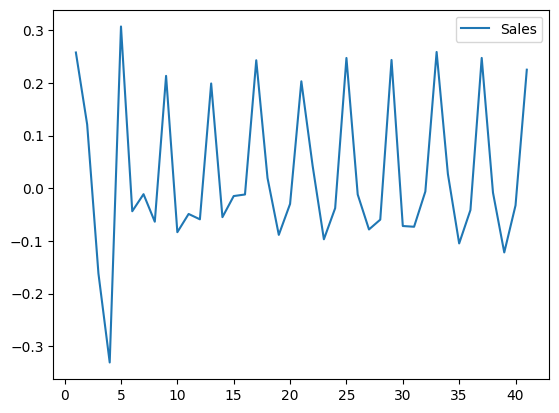

In [42]:
cocacola.plot()

In [ ]:
#still our data contains the seasonality so taking period of 4 as we have quarterly data

In [43]:
# Seasonal differencing
cocacola['Sales'] = cocacola['Sales'].diff(4)
cocacola = cocacola.drop(coctrain.index[1])

In [44]:
cocacola = cocacola.drop(coctrain.index[2])

In [45]:
cocacola = cocacola.drop(coctrain.index[3])

In [46]:
cocacola = cocacola.drop(coctrain.index[4])

In [47]:
cocacola

,Quarter,Sales
5,Q2_87,0.049409
6,Q3_87,-0.164767
7,Q4_87,0.150658
8,Q1_88,0.267345
9,Q2_88,-0.093801
10,Q3_88,-0.039753
11,Q4_88,-0.037570
12,Q1_89,0.004529
13,Q2_89,-0.014440
14,Q3_89,0.028548


In [48]:
cocacola.shape

(37, 2)

In [49]:
#again splitting the data
coctrain1= cocacola.head(29)
coctest1= cocacola.tail(8)

In [50]:
#Again checking for the fuller test of stationary data
 #applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller
 #creating a function for values
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
 #printing for AvgTemp
adf_test(coctrain1['Sales'])

1. ADF :  -5.583118118839325
2. P-Value :  1.382145775559211e-06
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 28
5. Critical Values :
	 1% :  -3.6889256286443146
	 5% :  -2.9719894897959187
	 10% :  -2.6252957653061224


In [ ]:
#hence now we have got p value very less so we can consider this data as stationary

In [ ]:
#finding best values of p,d and q

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """

    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [55]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, coctrain1['Sales'])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 3, 1, 0)",-39.685473
1,"(2, 1, 1, 0)",-39.140368
2,"(0, 3, 0, 3)",-39.033272
3,"(0, 3, 0, 2)",-38.743606
4,"(0, 1, 1, 0)",-38.437872
...,...,...
250,"(0, 0, 3, 1)",-21.361316
251,"(1, 0, 3, 3)",-21.327265
252,"(0, 0, 2, 3)",-20.791291
253,"(0, 0, 3, 2)",-20.568163


In [56]:
result_df.AIC.min()

-39.68547281383232

In [ ]:
# From the table, we can see that the best model is: SARIMA(0, 1, 3)(1, 1, 0, 4)

In [ ]:
#So this is the SARIMA model for the data

In [57]:
best_model = SARIMAX(coctrain1['Sales'], order=(0, 1, 3), seasonal_order=(1, 1, 0, 4)).fit(dis=-1)
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   29
Model:             SARIMAX(0, 1, 3)x(1, 1, [], 4)   Log Likelihood                  24.843
Date:                            Fri, 08 Dec 2023   AIC                            -39.685
Time:                                    11:56:19   BIC                            -33.795
Sample:                                         0   HQIC                           -38.123
                                             - 29                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3721      8.077     -0.170      0.865     -17.204      14.459
ma.L2         -0.1538      3.186   

In [ ]:
# Now predicting the data

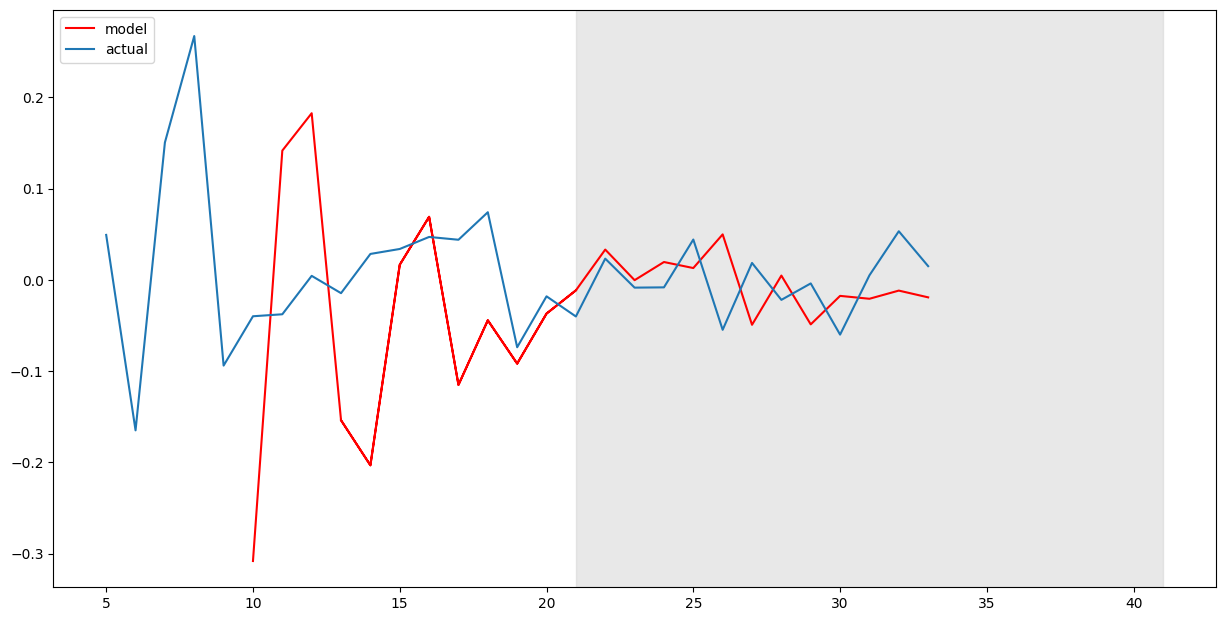

In [58]:
cocacola['arima_model'] = best_model.fittedvalues
cocacola['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=coctest1.Sales.shape[0], end=coctest1.Sales.shape[0] + 8)
forecast = cocacola['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(coctest1.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(coctrain1['Sales'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Hence this is model with minimum error if SARIMA is considered

**Problem statement 2:Forecast the Airlines Passengers. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.**

In [59]:
import pandas as pd

In [60]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [61]:
airline = pd.read_excel("Airlines+Data.xlsx")
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [62]:
import matplotlib.pyplot as plt

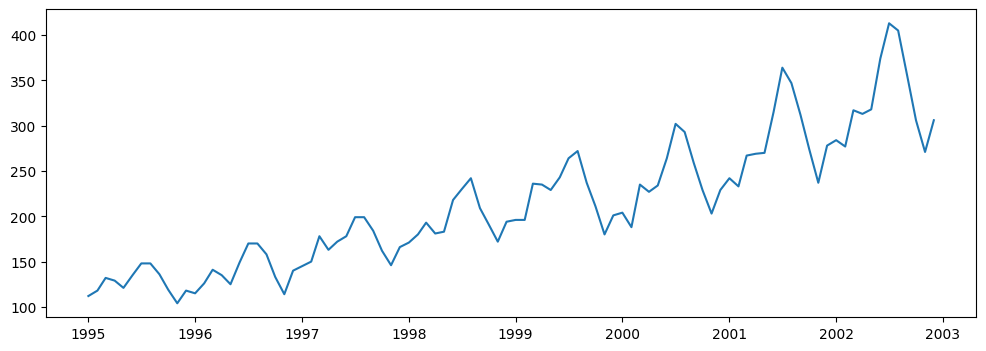

In [63]:
#Line plot of the airline data
plt.figure(figsize=(12,4))
plt.plot('Month','Passengers',data= airline)

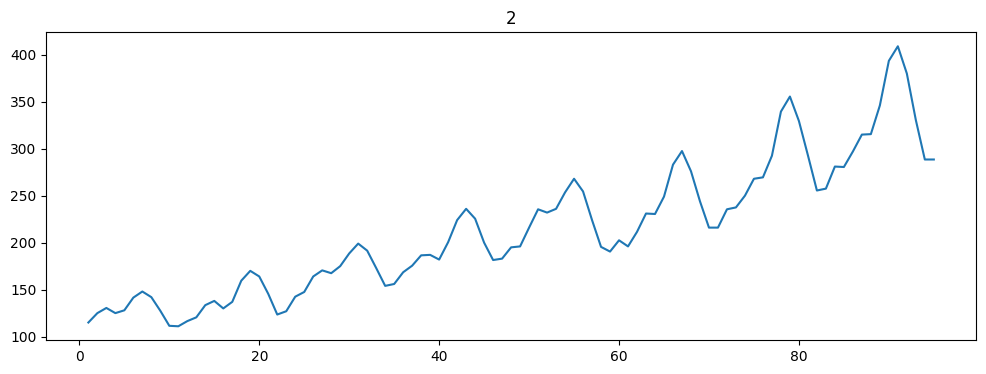

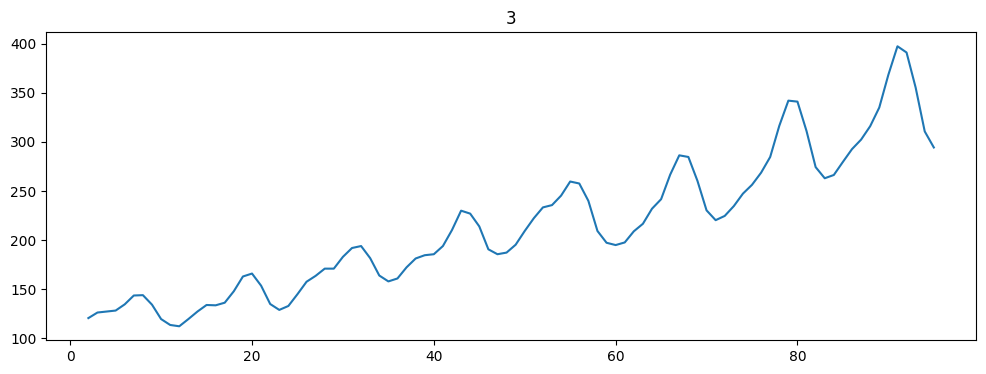

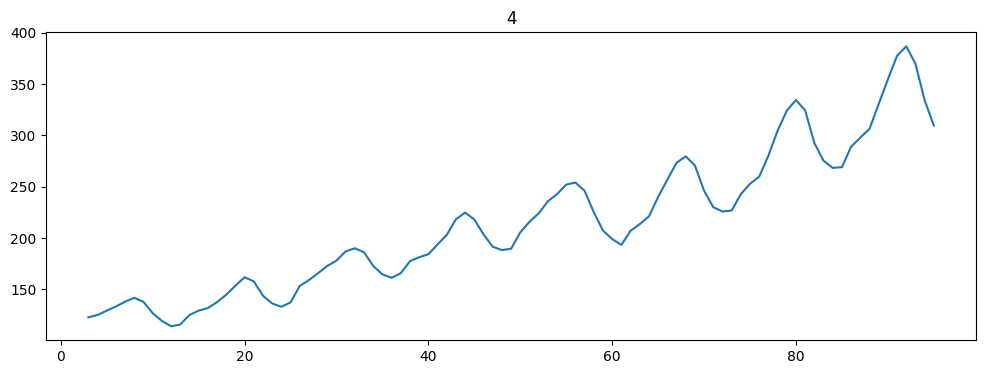

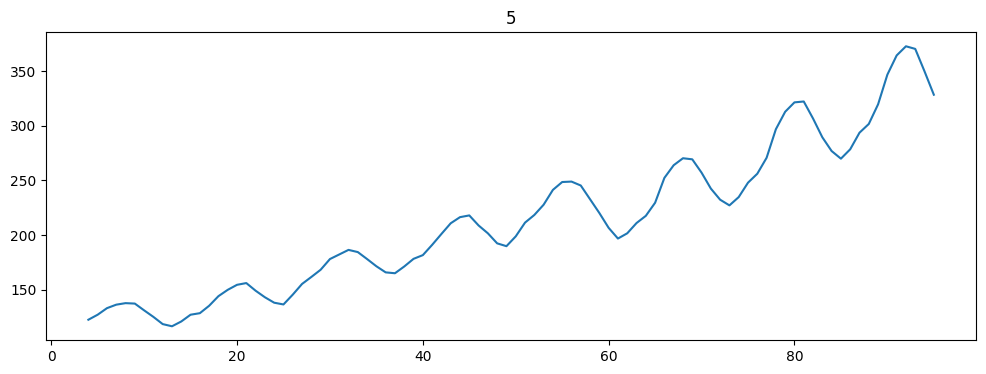

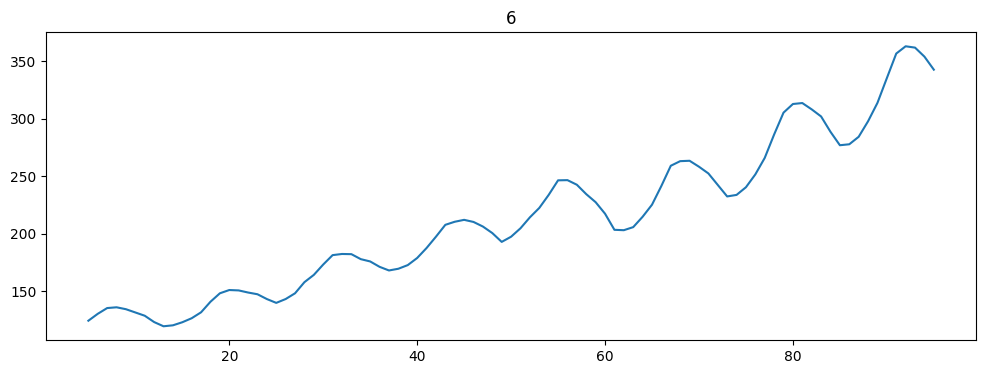

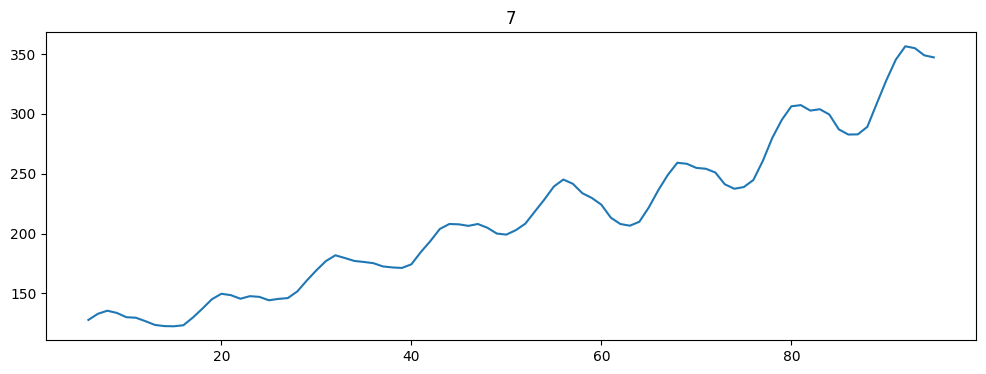

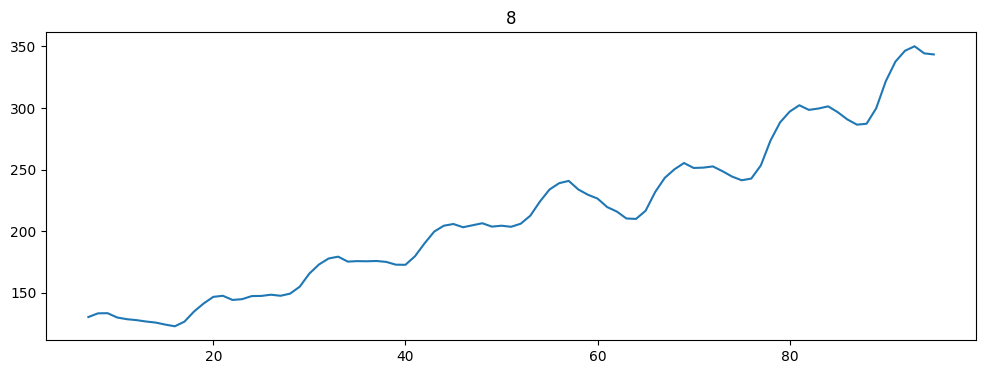

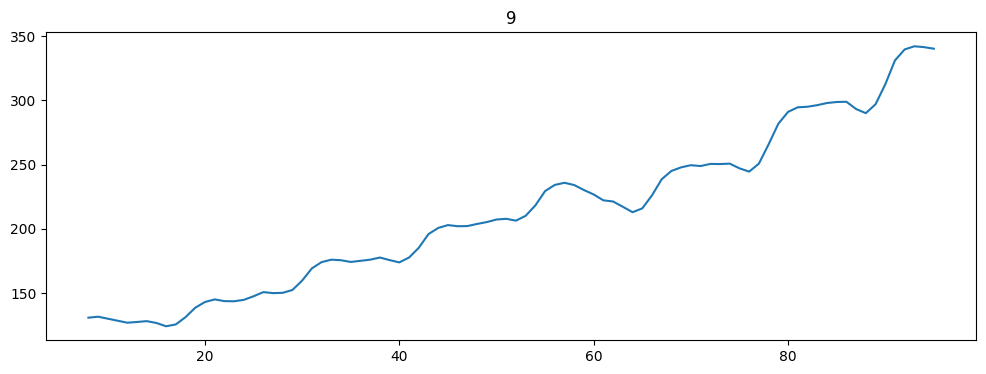

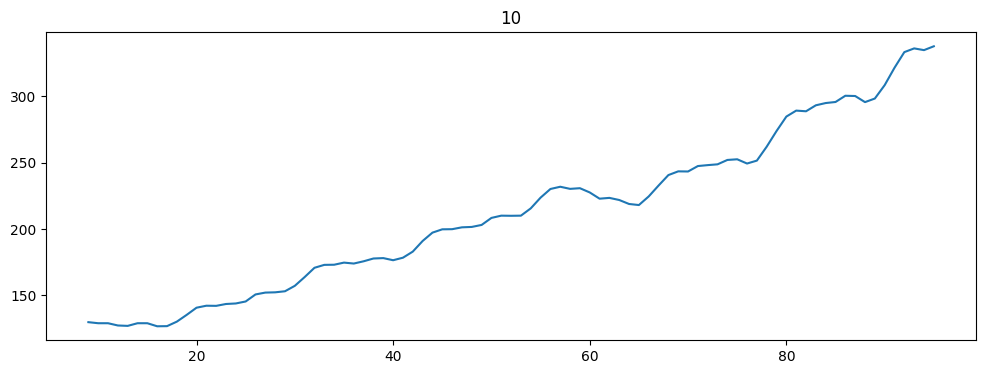

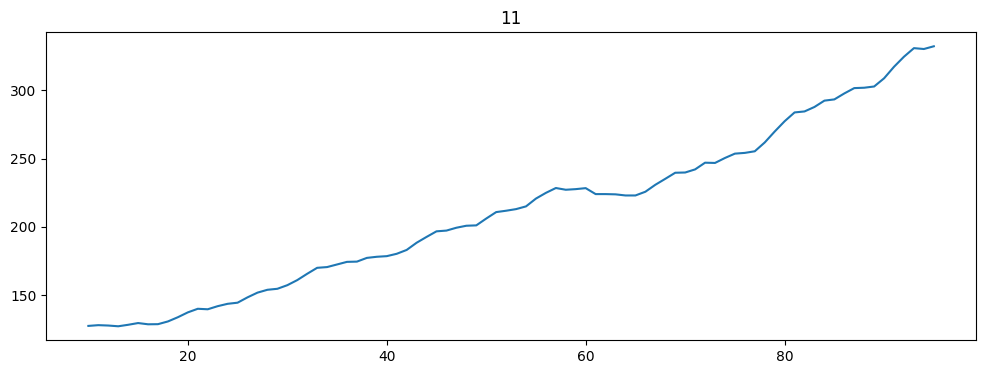

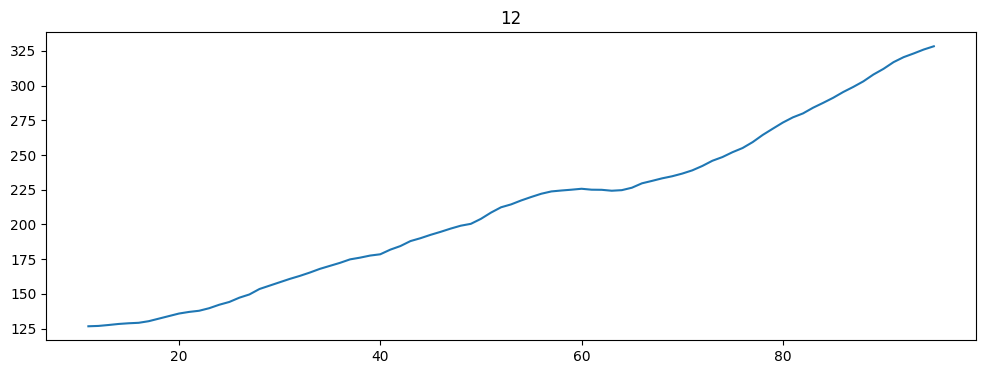

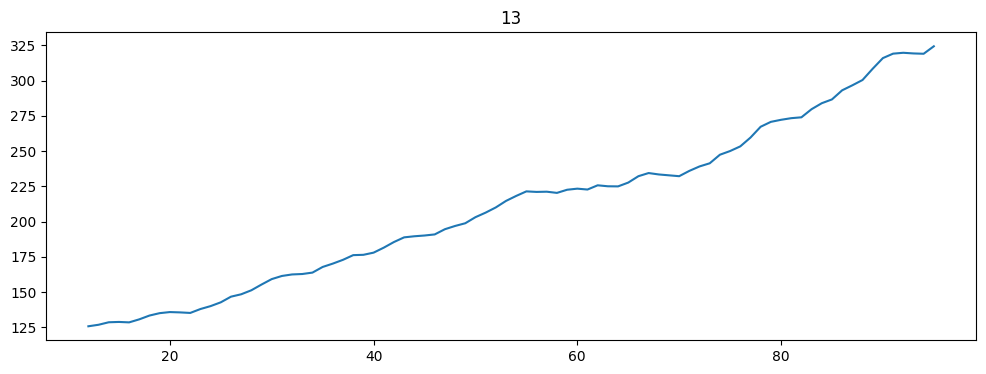

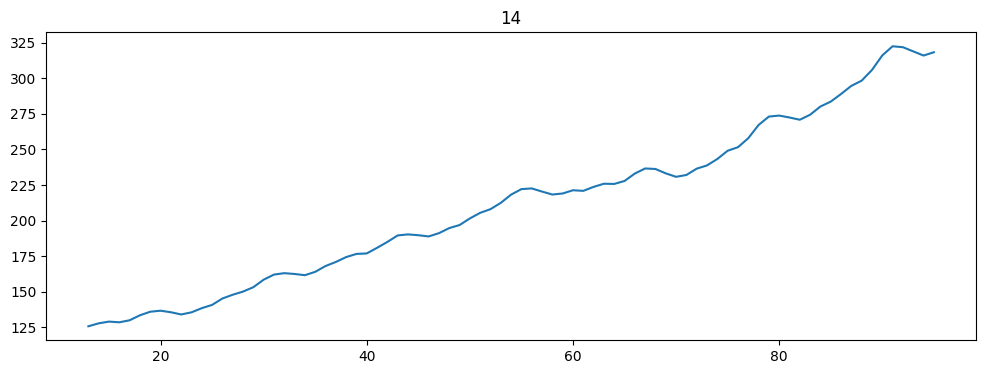

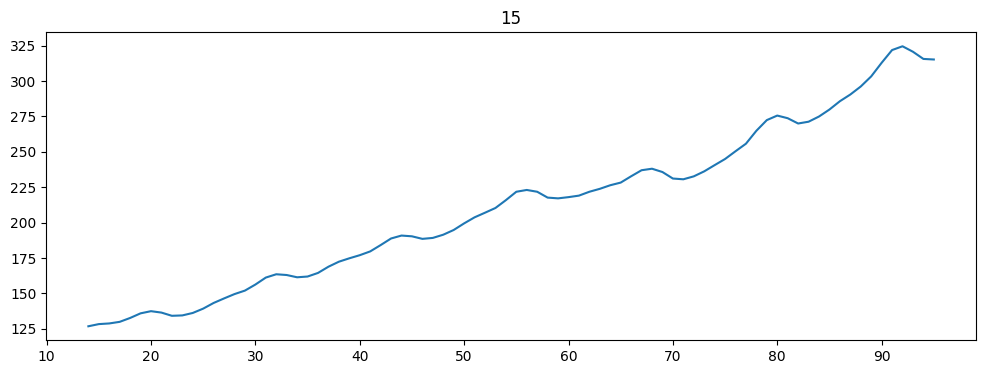

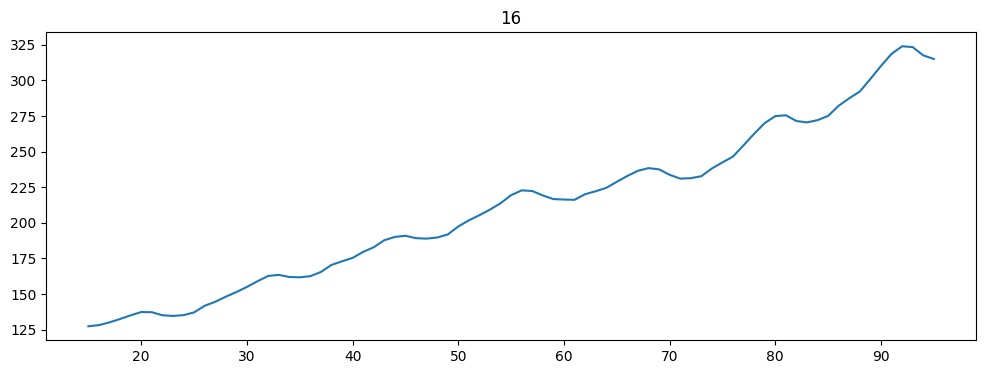

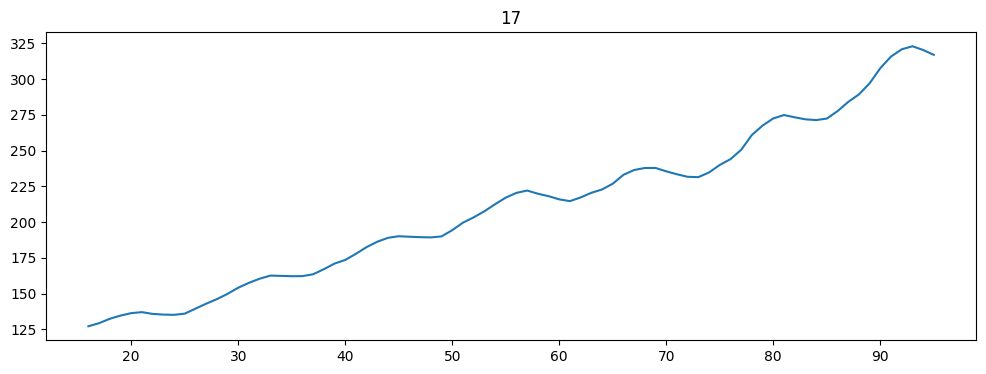

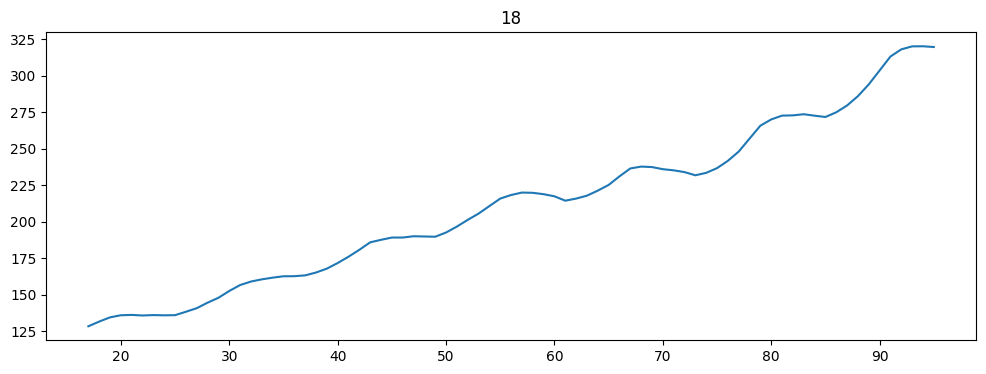

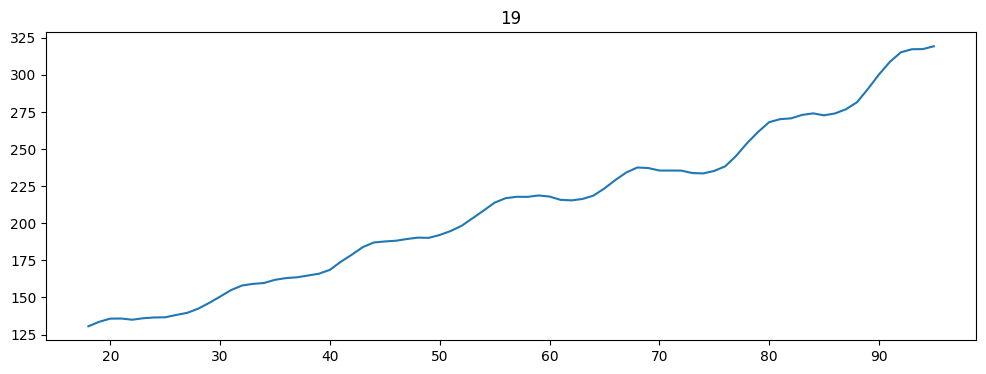

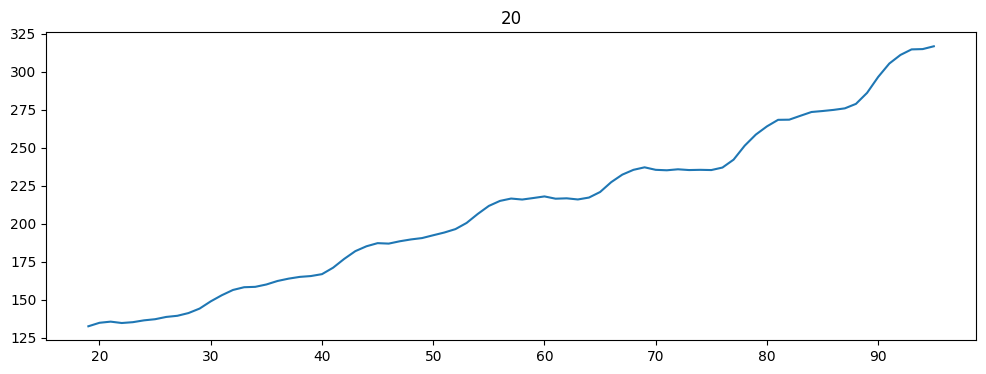

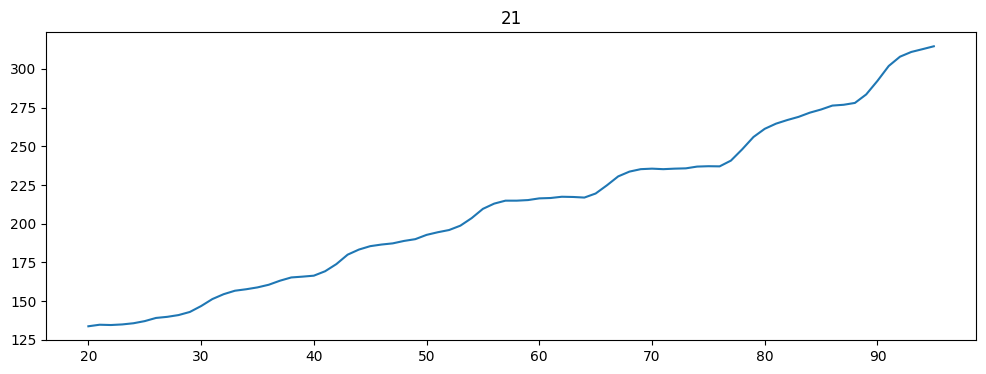

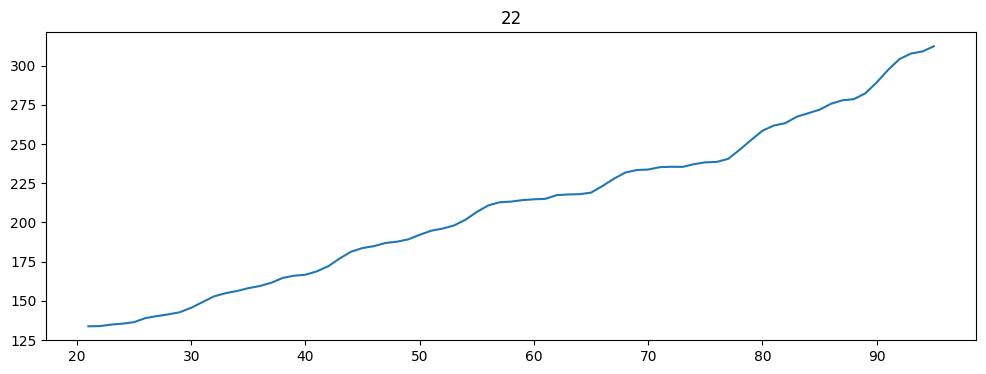

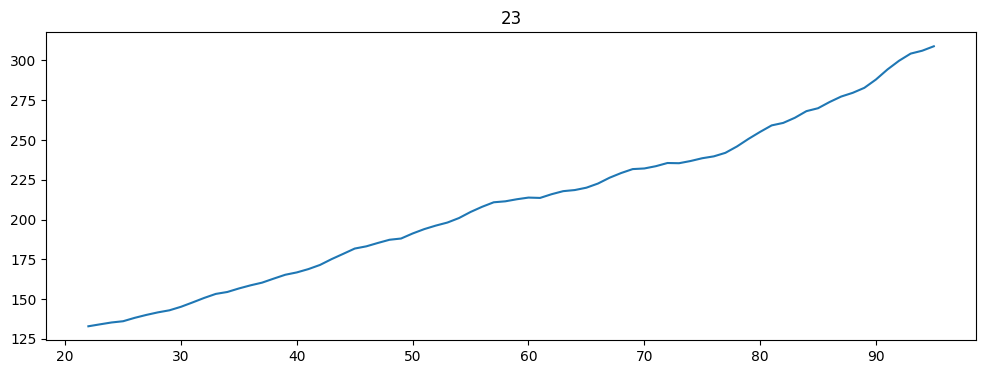

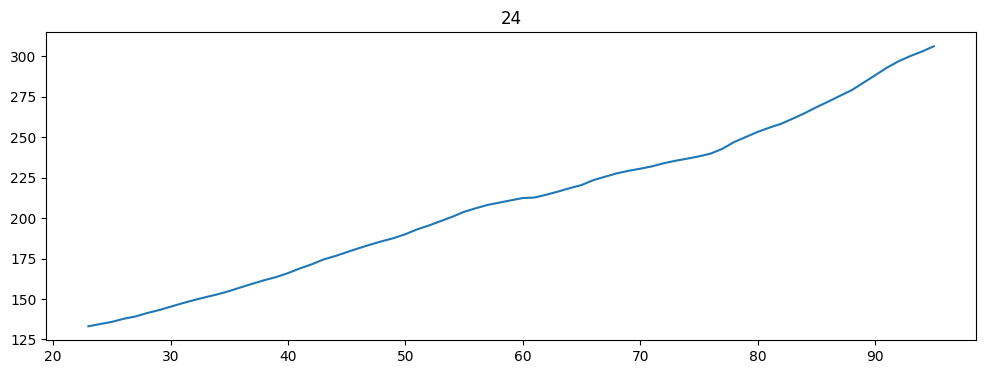

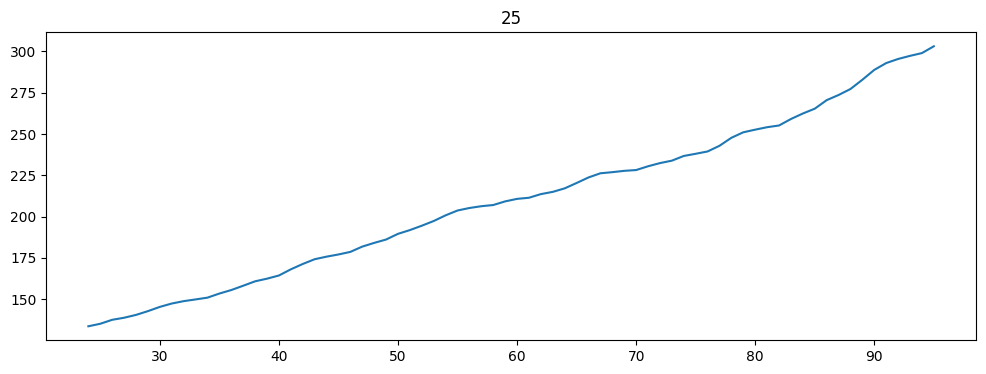

In [64]:
#Checking different window sizes for the airline data so as to find the best window size for moving average
for i in range(2,26):
    plt.figure(figsize=(12,4))
    airline.Passengers.rolling(i).mean().plot()
    plt.title(i)
    plt.show()

In [ ]:
#from the above graphs it was clear that period of 12 is the most suited window size where graph is getting more smooth so window size =12
#Also this can be also verified as this smoothening is occuring at window size of 24 also and its getting bad after 12 and 24

In [ ]:
#Time series decomposition plot with season and trend and noise

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

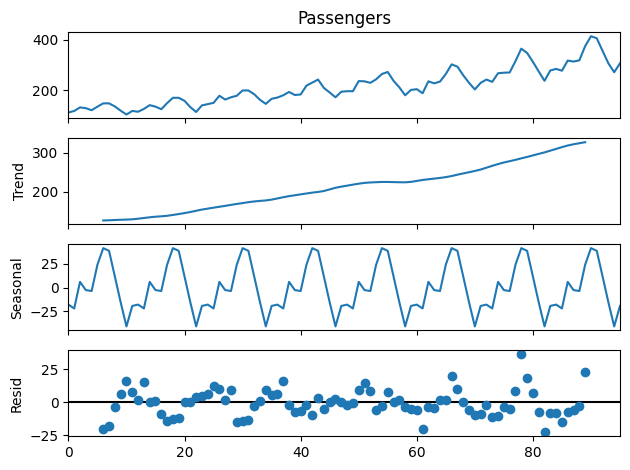

In [66]:
seasonal_decompose(airline.Passengers,period=12).plot()
plt.show()

In [67]:
#correlation plots
import statsmodels.graphics.tsaplots as tsa_plots

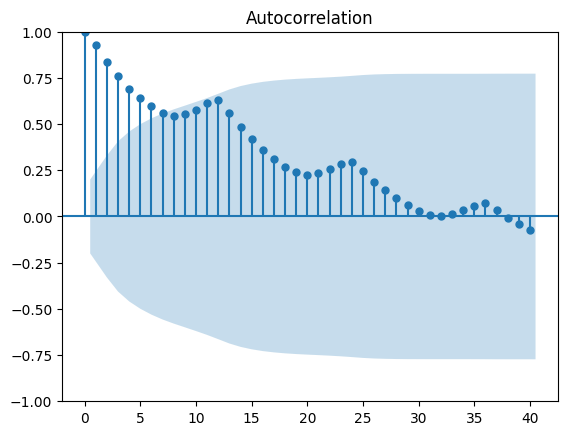

In [68]:
tsa_plots.plot_acf(airline.Passengers,lags=40)
plt.show()

In [ ]:
#Here we are getting correlation as first positive and then becoming negative.

In [ ]:
#Splitting the data

In [69]:
airtrain= airline.head(76)
airtest= airline.tail(20)

In [70]:
#defining rsme
def rsme(pred,org):
    sales = (((pred-org)**2).mean())**0.5
    return sales

In [71]:
import numpy as np
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
#model 1: simple exponetial model

In [72]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model_air = SimpleExpSmoothing(airtrain.Passengers).fit(smoothing_level=0.9)
pred_ses_air= ses_model_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])

In [73]:
rsme(pred_ses_air,airtest.Passengers)

66.540916130805

In [74]:
MAPE(pred_ses_air,airtest.Passengers)

14.866213671680418

In [ ]:
#Calculating the best value of smoothing level which gives minimum MAPE error

In [75]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9,0.95,0.96,0.99,1]
for i in x:
    ses_model1_air = SimpleExpSmoothing(airtrain.Passengers).fit(smoothing_level=i)
    pred_ses1_air= ses_model1_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])
    score_air= MAPE(pred_ses1_air,airtest.Passengers)
    print("for smoothing level",i,"MAPE is",score_air)

for smoothing level 0.2 MAPE is 20.42662222246686
for smoothing level 0.3 MAPE is 19.33768883456056
for smoothing level 0.4 MAPE is 18.31609625788075
for smoothing level 0.41 MAPE is 18.213189756511575
for smoothing level 0.42 MAPE is 18.11046795586624
for smoothing level 0.43 MAPE is 18.00804944834256
for smoothing level 0.44 MAPE is 17.906056090565382
for smoothing level 0.5 MAPE is 17.309782053680447
for smoothing level 0.55 MAPE is 16.845270985831572
for smoothing level 0.6 MAPE is 16.421024232104052
for smoothing level 0.7 MAPE is 15.712881914599915
for smoothing level 0.78 MAPE is 15.285225087838395
for smoothing level 0.8 MAPE is 15.197137428714251
for smoothing level 0.9 MAPE is 14.866213671680418
for smoothing level 0.95 MAPE is 14.768663168226263
for smoothing level 0.96 MAPE is 14.754640941455083
for smoothing level 0.99 MAPE is 14.723724973922586
for smoothing level 1 MAPE is 14.717178689707755


In [ ]:
#So this is giving minimum MAPE error at smoothing level= 1 suggesting that we can completely ignore the latest data and rely on old

In [ ]:
#Calculating the best value of smoothing level which gives minimum rsme error

In [76]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9,0.92,0.95,1]
for i in x:
    ses_model2_air = SimpleExpSmoothing(airtrain.Passengers).fit(smoothing_level=i)
    pred_ses2_air= ses_model2_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])
    score2_air= rsme(pred_ses2_air,airtest.Passengers)
    print("for smoothing level",i,"rsme is",score2_air)

for smoothing level 0.2 rsme is 82.11594363018779
for smoothing level 0.3 rsme is 78.91408255351932
for smoothing level 0.4 rsme is 75.9687439978107
for smoothing level 0.41 rsme is 75.67546240717311
for smoothing level 0.42 rsme is 75.38335802382537
for smoothing level 0.43 rsme is 75.09277100232848
for smoothing level 0.44 rsme is 74.80404767725767
for smoothing level 0.5 rsme is 73.12964728837855
for smoothing level 0.55 rsme is 71.84199622653486
for smoothing level 0.6 rsme is 70.67952059930927
for smoothing level 0.7 rsme is 68.76981634505216
for smoothing level 0.78 rsme is 67.63625427476727
for smoothing level 0.8 rsme is 67.40470108496214
for smoothing level 0.9 rsme is 66.540916130805
for smoothing level 0.92 rsme is 66.42556696354112
for smoothing level 0.95 rsme is 66.28816482432045
for smoothing level 1 rsme is 66.15512073906298


In [ ]:
#So this is giving minimum rsme error at smoothing level= 1 suggesting that we can completely ignore the latest data and rely on old

In [ ]:
#2. Holt double exponential smoothing method

In [77]:
from statsmodels.tsa.holtwinters import Holt
des_model_air = Holt(airtrain.Passengers).fit(smoothing_level=0.9,smoothing_trend=0.2)
pred_des_air= des_model_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])

In [78]:
rsme(pred_des_air,airtest.Passengers)

48.29010226388634

In [79]:
MAPE(pred_des_air,airtest.Passengers)

13.166133462387364

In [ ]:
#Calculating the value of smoothing trend which gives minimum MAPE error

In [80]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9,0.91,0.95,1]
y= [0.05,0.07,0.1,0.12,0.13,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
for i in x:
    for j in y:
        des_model1_air = Holt(airtrain.Passengers).fit(smoothing_level=i,smoothing_trend=j)
        pred_des1_air= des_model1_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])
        dscore_air= MAPE(pred_des1_air,airtest.Passengers)
        print("for smoothing levl",i,"smoothing trend",j,"MAPE is",dscore_air)

for smoothing levl 0.2 smoothing trend 0.05 MAPE is 13.900600443638751
for smoothing levl 0.2 smoothing trend 0.07 MAPE is 14.382228026671907
for smoothing levl 0.2 smoothing trend 0.1 MAPE is 14.769944948119658
for smoothing levl 0.2 smoothing trend 0.12 MAPE is 14.90310411201357
for smoothing levl 0.2 smoothing trend 0.13 MAPE is 14.93472805885008
for smoothing levl 0.2 smoothing trend 0.15 MAPE is 14.947056327971723
for smoothing levl 0.2 smoothing trend 0.16 MAPE is 14.937749446731548
for smoothing levl 0.2 smoothing trend 0.17 MAPE is 14.924598622167675
for smoothing levl 0.2 smoothing trend 0.18 MAPE is 14.911742105364606
for smoothing levl 0.2 smoothing trend 0.19 MAPE is 14.902587265034375
for smoothing levl 0.2 smoothing trend 0.2 MAPE is 14.899857174111208
for smoothing levl 0.2 smoothing trend 0.21 MAPE is 14.905720786637096
for smoothing levl 0.3 smoothing trend 0.05 MAPE is 13.561033422239266
for smoothing levl 0.3 smoothing trend 0.07 MAPE is 13.951902278751822
for smooth

In [ ]:
#so smoothing level 0.9 and smoothing trend nearby 0.05 gives the minimum MAPE error

In [ ]:
#Calculating the value of smoothing trend which gives minimum rsme error

In [81]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9,0.91,0.95,1]
y= [0.05,0.07,0.1,0.12,0.13,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
for i in x:
    for j in y:
        des_model2_air = Holt(airtrain.Passengers).fit(smoothing_level=i,smoothing_trend=j)
        pred_des2_air= des_model2_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])
        dscore2_air= rsme(pred_des2_air,airtest.Passengers)
        print("for smoothing levl",i,"smoothing trend",j,"rsme is",dscore2_air)

for smoothing levl 0.2 smoothing trend 0.05 rsme is 61.746572473119336
for smoothing levl 0.2 smoothing trend 0.07 rsme is 63.265244617052154
for smoothing levl 0.2 smoothing trend 0.1 rsme is 64.50901376253867
for smoothing levl 0.2 smoothing trend 0.12 rsme is 64.93338299182209
for smoothing levl 0.2 smoothing trend 0.13 rsme is 65.03083058260749
for smoothing levl 0.2 smoothing trend 0.15 rsme is 65.05947897490238
for smoothing levl 0.2 smoothing trend 0.16 rsme is 65.02425810350539
for smoothing levl 0.2 smoothing trend 0.17 rsme is 64.97768955700052
for smoothing levl 0.2 smoothing trend 0.18 rsme is 64.93354849572168
for smoothing levl 0.2 smoothing trend 0.19 rsme is 64.90311390387424
for smoothing levl 0.2 smoothing trend 0.2 rsme is 64.89536980820148
for smoothing levl 0.2 smoothing trend 0.21 rsme is 64.91748627869435
for smoothing levl 0.3 smoothing trend 0.05 rsme is 60.70889557806204
for smoothing levl 0.3 smoothing trend 0.07 rsme is 61.91230653964149
for smoothing levl 0

In [ ]:
#so smoothing level 0.95 and smoothing trend nearby 0.15 gives the minimum MAPE error.Also compared with the single exponential model this model gives less error(both rsme and MAPE)

In [ ]:
#3.1 Holts winter exponential smoothing with additive seasonality and additive trend

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tes_model_air= ExponentialSmoothing(endog=airtrain.Passengers,trend='add',seasonal='add',seasonal_periods=12).fit(smoothing_level=0.9,smoothing_trend=0.15)
pred_tes_air=tes_model_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])

In [83]:
MAPE(pred_tes_air,airtest.Passengers)

5.639328611847455

In [84]:
rsme(pred_tes_air,airtest.Passengers)

26.698820948250923

In [ ]:
#3.2 Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [85]:
tes_model_air1= ExponentialSmoothing(endog=airtrain.Passengers,trend='add',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.9,smoothing_trend=0.15)
pred_tes_air1=tes_model_air1.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])

In [86]:
MAPE(pred_tes_air1,airtest.Passengers)

5.284835148698038

In [87]:
rsme(pred_tes_air1,airtest.Passengers)

20.618982495674715

In [ ]:
#So Holts winter exponential smoothing with multiplicative seasonality and additive trend gives minimum error values for both(rsme and MAPE)

In [ ]:
# So we can say that this is best model compared with simple and double exponential model

In [88]:
#So forecasting the data with this
tes_model_air1.forecast(10)

76    267.528908
77    297.677473
78    329.722127
79    332.376451
80    295.742895
81    261.988680
82    230.549337
83    261.933822
84    268.825665
85    267.319490
dtype: float64

In [ ]:
#Check with the arima model

In [91]:
from statsmodels.tsa.arima.model import ARIMA

In [94]:
model1= ARIMA(airtrain.Passengers.astype('float64'),order=(3,2,1))

In [95]:
model_fit1= model1.fit()

In [98]:
yhat1= model_fit1.forecast()

In [99]:
rsme(yhat1,airtest.Passengers.astype('float64'))

2.406005795273643

In [100]:
 #applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller
 #creating a function for values
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
 #printing for AvgTemp
 adf_test(airtrain['Passengers'])

1. ADF :  0.13365785512442357
2. P-Value :  0.9682853501421519
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 63
5. Critical Values :
	 1% :  -3.5386953618719676
	 5% :  -2.9086446751210775
	 10% :  -2.591896782564878


In [ ]:
#As p value is high we can say that data is not stationary

In [101]:
#Now, let’s take the log difference in an effort to make it stationary
airline['Passengers'] = np.log(airline['Passengers'])
airline['Passengers'] = airline['Passengers'].diff()
airline = airline.drop(coctrain.index[0])

In [102]:
airline

,Month,Passengers
1,1995-02-01,0.052186
2,1995-03-01,0.112117
3,1995-04-01,-0.022990
4,1995-05-01,-0.064022
5,1995-06-01,0.109484
...,...,...
91,2002-08-01,-0.019561
92,2002-09-01,-0.131769
93,2002-10-01,-0.148533
94,2002-11-01,-0.121466


<Axes: >

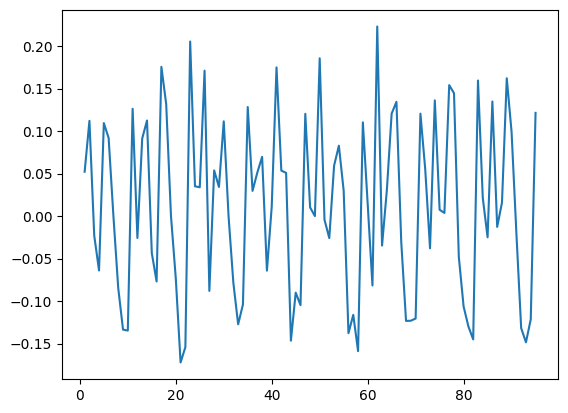

In [103]:
airline.Passengers.plot()

In [ ]:
#still our data contains the seasonality so taking period of 1 as we have monthly data

In [104]:
# Seasonal differencing
airline['Passengers'] = airline['Passengers'].diff(1)

In [105]:
airline = airline.drop(coctrain.index[1])

In [106]:
airline

,Month,Passengers
2,1995-03-01,0.059932
3,1995-04-01,-0.135107
4,1995-05-01,-0.041032
5,1995-06-01,0.173506
6,1995-07-01,-0.017547
...,...,...
91,2002-08-01,-0.118752
92,2002-09-01,-0.112209
93,2002-10-01,-0.016763
94,2002-11-01,0.027066


In [107]:
airline.shape

(94, 2)

In [108]:
#again splitting the data
airtrain1= airline.head(75)
airtest1= airline.tail(19)

In [109]:
#Again checking for the fuller test of stationary data
 #applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller
 #creating a function for values
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
 #printing for AvgTemp
adf_test(airtrain1['Passengers'])

1. ADF :  -9.336463399016482
2. P-Value :  9.035071885785033e-16
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 63
5. Critical Values :
	 1% :  -3.5386953618719676
	 5% :  -2.9086446751210775
	 10% :  -2.591896782564878


In [ ]:
#hence now we have got p value very less so we can consider this data as stationary

In [ ]:
#finding best values of p,d and q

In [110]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [111]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """

    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [112]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [113]:
result_df1 = optimize_SARIMA(parameters_list, 1, 1, 4, airtrain1['Passengers'])
result_df1

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 3, 2, 3)",-177.912953
1,"(1, 2, 2, 3)",-177.640053
2,"(0, 2, 2, 3)",-177.157519
3,"(0, 3, 3, 3)",-176.807190
4,"(0, 2, 3, 3)",-174.895040
...,...,...
251,"(3, 0, 0, 0)",5.769007
252,"(1, 0, 1, 0)",12.393907
253,"(1, 0, 0, 0)",28.188494
254,"(0, 0, 1, 0)",39.204965


In [114]:
result_df1.AIC.min()

-177.91295277699675

In [ ]:
# From the table, we can see that the best model is: SARIMA(0, 1, 3)(2, 1, 3, 4)

In [ ]:
#So this is the SARIMA model for the data

In [115]:
best_model1 = SARIMAX(airtrain1['Passengers'], order=(0, 1, 3), seasonal_order=(2, 1, 3, 4)).fit(dis=-1)
print(best_model1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Passengers   No. Observations:                   75
Model:             SARIMAX(0, 1, 3)x(2, 1, 3, 4)   Log Likelihood                  97.956
Date:                           Fri, 08 Dec 2023   AIC                           -177.913
Time:                                   13:34:12   BIC                           -157.676
Sample:                                        0   HQIC                          -169.875
                                            - 75                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.2806      4.103     -0.556      0.578     -10.323       5.762
ma.L2          1.5853      5.303      0.299

In [ ]:
# Now predicting the data

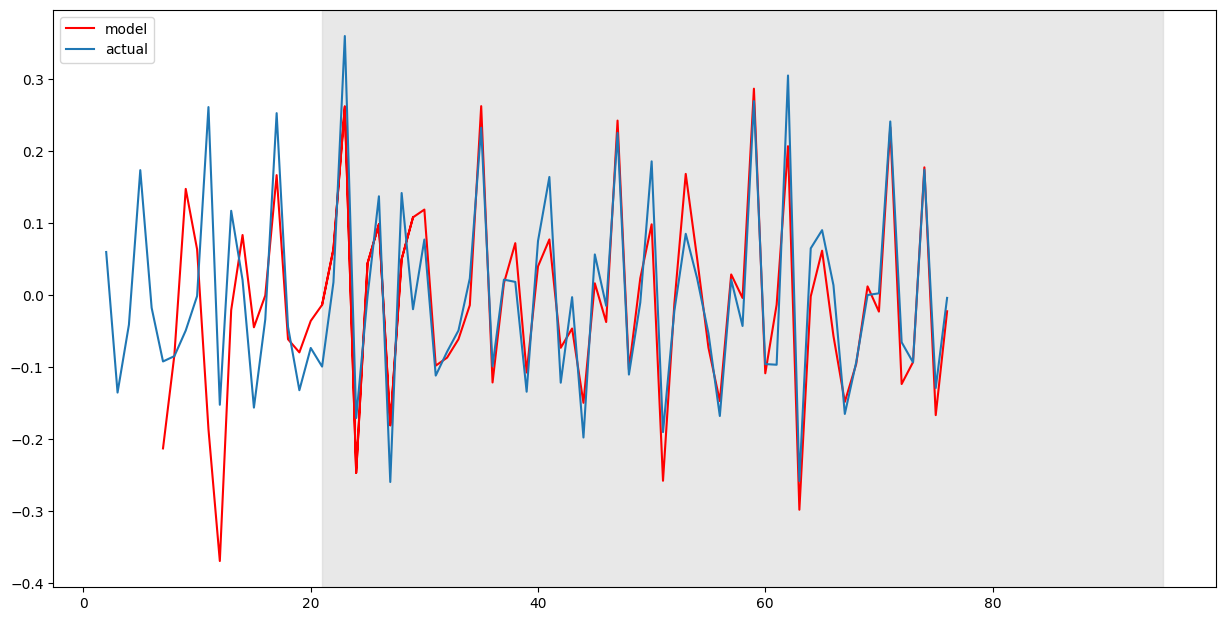

In [116]:
airline['arima_model1'] = best_model1.fittedvalues
airline['arima_model1'][:4+1] = np.NaN
forecast1 = best_model1.predict(start=airtest1.Passengers.shape[0], end=airtest1.Passengers.shape[0] + 8)
forecast1 = airline['arima_model1'].append(forecast1)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast1, color='r', label='model')
plt.axvspan(airtest1.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(airtrain1['Passengers'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Hence this is model with minimum error if SARIMA is considered